**IMPORTING THE LIBRARIES**

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

**READING THE DATASET**

In [61]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='q5zwgHAHTb9BABDz8rUwJf5P3v4pY1UxEeSWziwgmwi0',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu.cloud-object-storage.appdomain.cloud')

bucket = 'universityadmiteligibilitypredict-donotdelete-pr-mr5e978f494cm6'
object_key = 'Admission_Predict.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


**ANALYSING THE DATASET**

In [62]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [63]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [64]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [66]:
data.shape

(400, 9)

**Observations on data types of the features :**

*All the data is in numeric format.

*All the features have 400 observations as non null. 

*This gives a good confidance to the data for outlier handling.

> To confirm, data can be cross check again for nulls, nans and outliers.



**HANDLING MISSING VALUES**

In [67]:
data.isnull().any()

Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

In [68]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

**DESCRIPTIVE STATISTICS FOR THE DATA**

In [69]:
data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Serial No.,400.0,200.50,115.61,1.00,100.75,200.50,300.25,400.00
GRE Score,400.0,316.81,11.47,290.00,308.00,317.00,325.00,340.00
TOEFL Score,400.0,107.41,6.07,92.00,103.00,107.00,112.00,120.00
University Rating,400.0,3.09,1.14,1.00,2.00,3.00,4.00,5.00
SOP,400.0,3.40,1.01,1.00,2.50,3.50,4.00,5.00
LOR,400.0,3.45,0.90,1.00,3.00,3.50,4.00,5.00
CGPA,400.0,8.60,0.60,6.80,8.17,8.61,9.06,9.92
Research,400.0,0.55,0.50,0.00,0.00,1.00,1.00,1.00
Chance of Admit,400.0,0.72,0.14,0.34,0.64,0.73,0.83,0.97


**Observations:**


> Since all the features are numeric in nature, simply using count, mean, std-dev, minimum, maximum, 25th percentile, 50th percentile (median) and 75th percentile will be enough to understand the data.

>GRE Score: Has observed mean score at 316.81 out of 340 with standard deviation of 11.47. For the same minimum score observed at 290/340 and maximum score at 340/340. And and range 25th to 75th percentile is [308 - 325].

>TOEFL Score: Has observed mean score at 107.41/120 with standard deviation of 6.07. For the same minimum score observed at 92/120 and maximum score at 120/120. And and range 25th to 75th percentile is [103 - 112].

>University Rating: Average rating of universities is 3.40 with a standard deviation 1.14. And since the ranting is in range of [1-5] inclusive the 5 points are distributed as minimum at 1, maximum at 5 and 25th and 75th percentile at 2 and 4 respectively. *

>SOP Statement of Purpose : Average rating of SOP is 3.37 with a standard deviation 1.01. And since the ranting is in range of [1-5] inclusive the 5 points are distributed as minimum at 1, maximum at 5 and 25th and 75th percentile at 2.50 and 4 respectively. *

>LOR Letter of Recommendation Strength : Average rating of LOR is 3.45 with a standard deviation 0.90. And since the ranting is in range of [1-5] inclusive the 5 points are distributed as minimum at 1, maximum at 5 and 25th and 75th percentile at 3 and 4 respectively. *

>CGPA : Average CGPA score is 8.60/10 with a standard deviation 0.60. For the same minimum score observed at 6.80/10 and maximum score at 9.92/10. And the range of 25th to 75th percentile is [8.17- 9.06].

>Research : This is a binary status feature with value 0 or 1. And to analyse this 5 point description is not very good tool and will be further anlysed in EDA as categorical variable. The only input we can take from this is mean is 0.55, suggesting 55% has opted in research.

>Chance of Admit : The mean value is observed at 0.72 with a standard deviation of 0.14. For the same minimum is observed at 0.34 and maximum is observed at 0.97. And the range of 25th and 75th percentile is [0.64-0.83].




* Note - Since ratings are fixed range of [1-5] it will be treated as categorical feature for further Explorative analysis










**Dropping Serial Number from the Dataset**

In [70]:
data = data.drop(["Serial No."],axis=1)

In [71]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


**OUTLIER DETECTION**

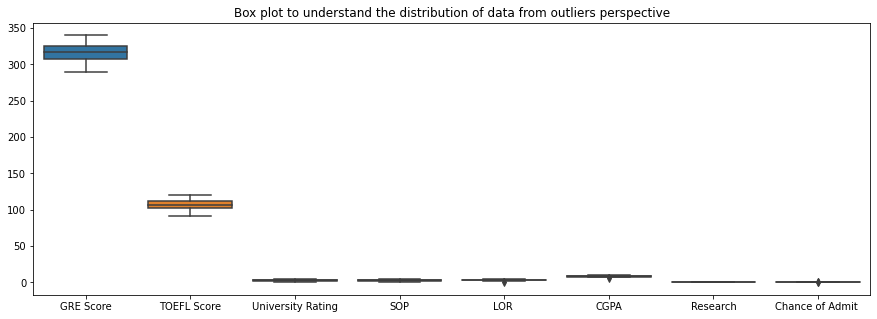

In [72]:
plt.figure(figsize=(15,5))
sns.boxplot(data = data);
plt.title("Box plot to understand the distribution of data from outliers perspective");

**Observations:**

>Since the features are in different range,
further analysis is required to better understand the presence of outliers.

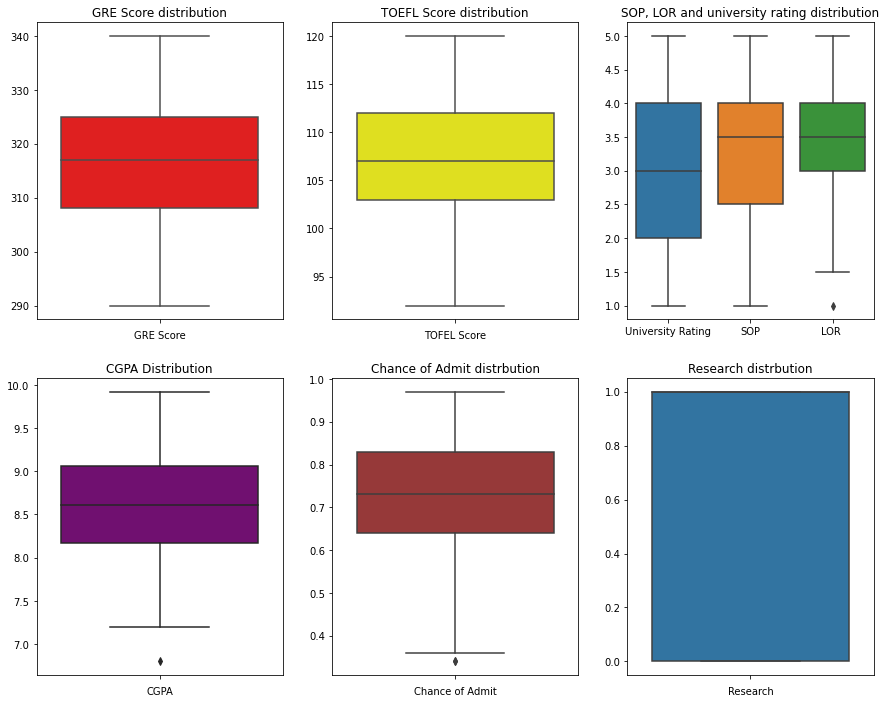

In [73]:
#Checking individual columns

plt.figure(figsize=(15, 12))
plt.subplot(231)
sns.boxplot(y=data["GRE Score"], color='red');
plt.xlabel("GRE Score");
plt.ylabel("");
plt.title("GRE Score distribution");


plt.subplot(232)
sns.boxplot(y=data["TOEFL Score"], color='yellow');
plt.xlabel("TOFEL Score");
plt.ylabel("");
plt.title("TOEFL Score distribution");

plt.subplot(233)
sns.boxplot(data=data[[ "University Rating","SOP", "LOR "]]);
plt.title("SOP, LOR and university rating distribution");

plt.subplot(234)
sns.boxplot(y = data["CGPA"], color='purple');
plt.xlabel("CGPA");
plt.ylabel("");
plt.title("CGPA Distribution");

plt.subplot(235)
sns.boxplot(y=data["Chance of Admit "], color='brown');
plt.xlabel("Chance of Admit");
plt.ylabel("");
plt.title("Chance of Admit distrbution");


plt.subplot(236)
sns.boxplot(y=data["Research"]);
plt.xlabel("Research");
plt.ylabel("");
plt.title("Research distrbution");

**Observations**

>In total 2 outliers have been identified.

>Features in which outlier has been identified are LOR and Chance of Admit.

>Based on the observation the outliers are in the lower side of the value and can be a corner cases. 

>In explorative analysis they can be viewed in depth to take a decision on how to handle this outliers.

**EXPLORATIVE DATA ANALYSIS**

**Univariate analysis**

**1. GRE SCORE**

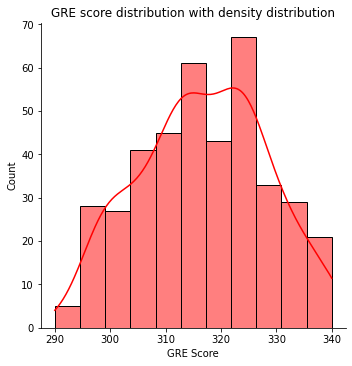

In [74]:
sns.displot(x=data["GRE Score"], kde=True, color='red')
plt.title("GRE score distribution with density distribution");

**Observations:**


> Score is distributed in the range of 290 to 340.

>Peaks are observed between 310 to 330 indicating most applicants have scored in this range.

>As high as 70 applicants have scored between 315 to 320.

>The distribution looks normal and can be further confirmed by QQ-plot.




**2. TOEFL SCORE**

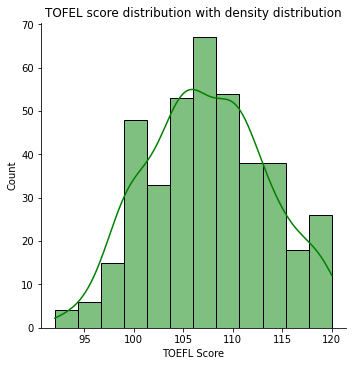

In [75]:
sns.displot(x=data["TOEFL Score"], kde=True, color='green')
plt.title("TOFEL score distribution with density distribution");

**Observations**


> TOFEL scores are distributed in the range of 90 to 120.

>As high as 60 to 70 applicants have scored between 105 to 107.

>A good number of applicants have scored in between 97 to 113.

>Distribution seems to be normal and can be confirmed by QQ-plot.



**3. UNIVERSITY RATINGS**

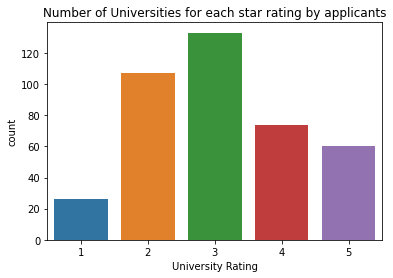

In [76]:
sns.countplot(x=data["University Rating"]);
plt.title("Number of Universities for each star rating by applicants");

**Observations**


> Close to 120 applicants have marked their university as 3 stars.

> 3 stars are followed by 2 stars for universities.

> 1 star is given by only 20 to 25 applicants which is lowest.



**4. SOP : STATEMENT OF PURPOSE**

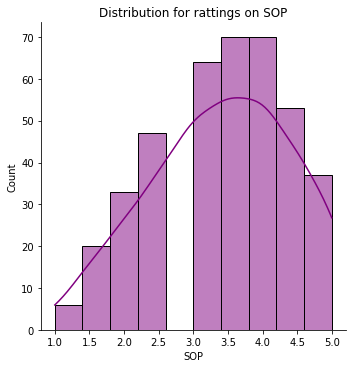

In [77]:
sns.displot(x=data["SOP"], kde=True, color='purple');
plt.title("Distribution for rattings on SOP");

**Observations**

>Most of the applicants have received 2.5 to 3.0 stars in their SOP.

>Based on the plot, rating distribution can be bucketed in 2 sections 1.0 to 2.5 as low ratings and 3.0 to 5.0 as high level of ratings.

>This provides a really well quantified information on strength of statement of purpose.


**5. LOR : LETTER OF RECOMMENDATIONS**

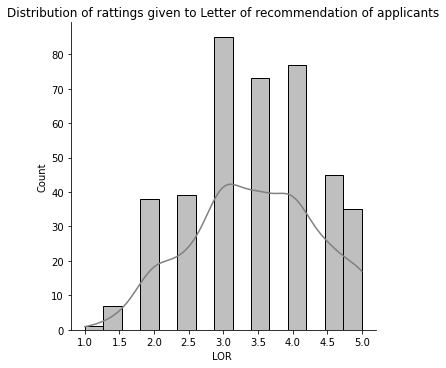

In [78]:
sns.displot(x=data["LOR "], kde=True, color='grey');
plt.title("Distribution of rattings given to Letter of recommendation of applicants");

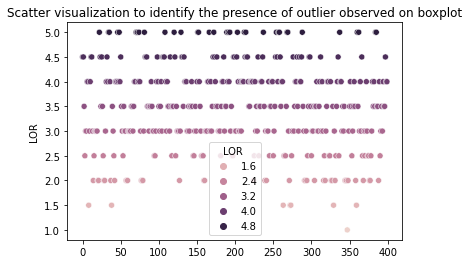

In [79]:
sns.scatterplot(x=data.index, y = data["LOR "], hue=data["LOR "]);
plt.title("Scatter visualization to identify the presence of outlier observed on boxplot");

**Observations**


> Most applicants have a recommendation ratting of 3.0.

>A very good number of applicants are having LOR ratting between 3 to 4 inclusive.

>The outlier observed in boxplot is basically just one applicant having the lowest rating of 1.



**6. CGPA**

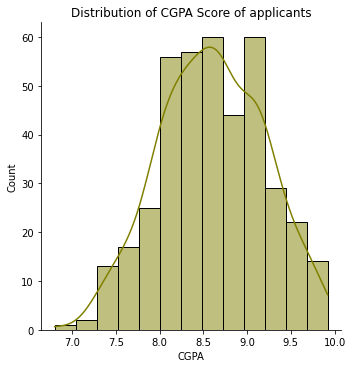

In [80]:
sns.displot(x=data["CGPA"], kde=True, color='olive');
plt.title("Distribution of CGPA Score of applicants");

**Observations**


> CGPA scores are distributed in range of 6.9 to 9.7 inclusive.

>More than 50 applicants have the CGPA of 8.56.

>Saturation can be observed as a great number of applicants have a CGPA between 7.90 to 9.25.



**7.RESEARCH**

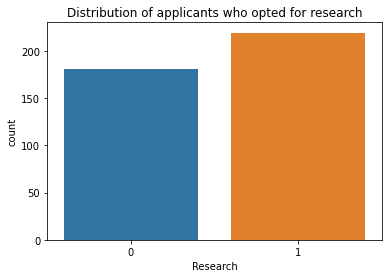

In [81]:
sns.countplot(x=data["Research"]);
plt.title("Distribution of applicants who opted for research");

**Observations**



> Out of 500 applicants approx 280 applicants have opted for research.

>In precentage 56% applicants are chosing for research option.





**8. CHANCE OF ADMIT**

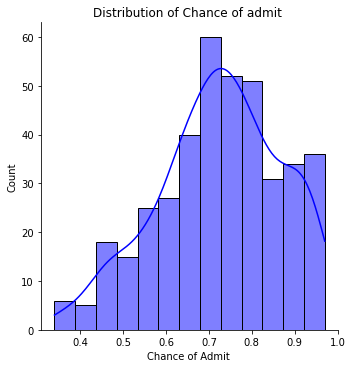

In [82]:
sns.displot(x=data["Chance of Admit "], kde=True, color='blue');
plt.title("Distribution of Chance of admit ");

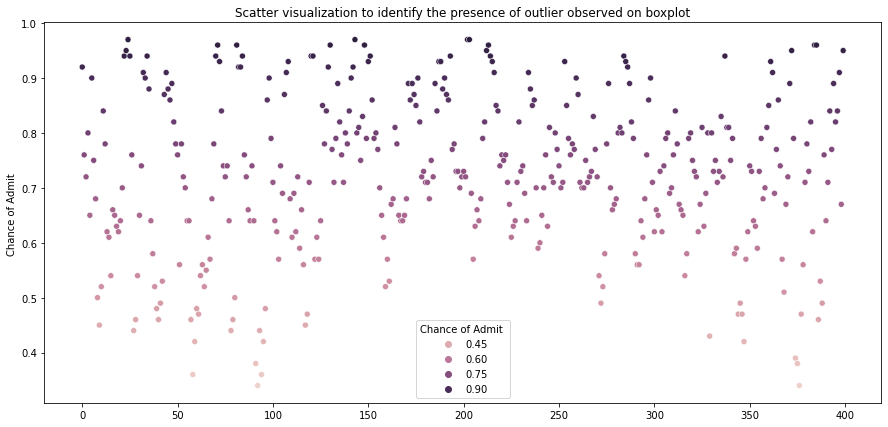

In [83]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=data.index, y = data["Chance of Admit "], hue=data["Chance of Admit "]);
plt.title("Scatter visualization to identify the presence of outlier observed on boxplot");

**Observations**



> Chances are distributed between 0.35 to 0.9 inclusive.

> Highest number of applicants have chance of admit between 0.7-0.75.

> Most number of students have a chance of admit above 0.6.

> The one outlier that was observed in box plot was because of one student having a low chance of 0.34 which is also the minimum value registerd in the data.



**Bivariate Analysis**

**1. Comparison of GRE score with Chance Of Admit and Research**

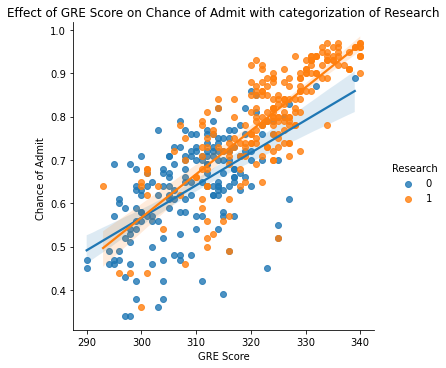

In [84]:
sns.lmplot(y="Chance of Admit ", x = "GRE Score", hue="Research", data=data);
plt.title("Effect of GRE Score on Chance of Admit with categorization of Research");

**Observations**



> As the GRE Score increases and so the Chance of Admit increases.

> Applicants who opts for research tends to have higher GRE Score and the Chance of Admit.



**2. Comparison of TOEFL score with Chance Of Admit and Research**

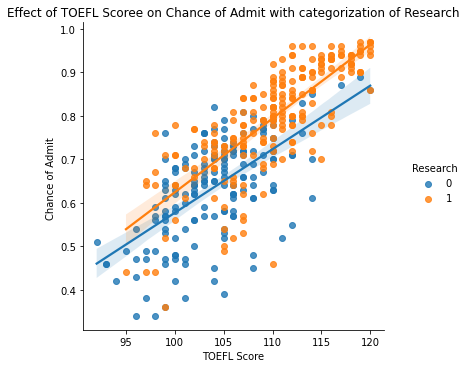

In [85]:
sns.lmplot(y="Chance of Admit ", x = "TOEFL Score", hue="Research", data=data);
plt.title("Effect of TOEFL Scoree on Chance of Admit with categorization of Research");

**Observations**



> As the TOFEL Score increases So does the chance of admit.

>Applicants who have opted for research tend to have higher chance of admit.



**3. Comparison of University Rating with Chance Of Admit and Research**

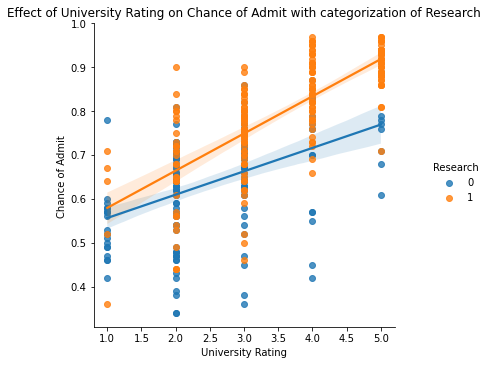

In [86]:
sns.lmplot(y="Chance of Admit ", x = "University Rating", hue="Research", data=data);
plt.title("Effect of University Rating on Chance of Admit with categorization of Research");

**Observations**



> As University Rating increases So does the chance of admit.

>Universities with higher rating have more Research opted applicants.



**4. Comparison of Statement Of Purpose(SOP) with Chance Of Admit and Research**

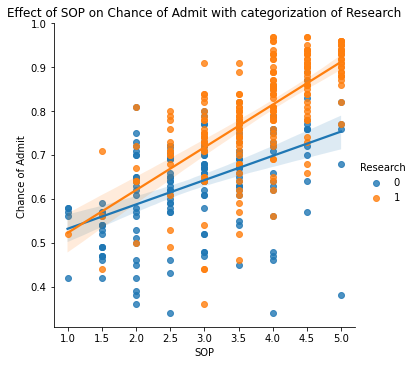

In [87]:
sns.lmplot(y="Chance of Admit ", x = "SOP", hue="Research", data=data);
plt.title("Effect of SOP on Chance of Admit with categorization of Research");

**Observations**



> Strength of Statement of purpose has a great impact on chance of Admit.

>Applicant with High score on SOP and opted for research have almost sure shot at chance of admit.



**5. Comparison of Letter Of Recommendations(LOR) with Chance Of Admit and Research**

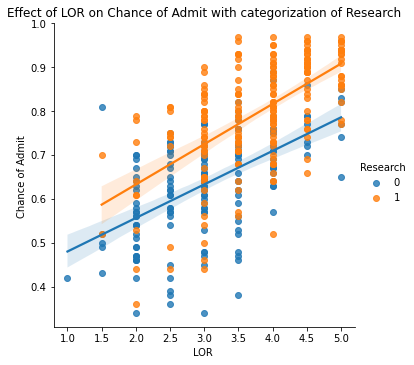

In [88]:
sns.lmplot(y="Chance of Admit ", x = "LOR ", hue="Research", data=data);
plt.title("Effect of LOR on Chance of Admit with categorization of Research");

**Observations**



> As the score of LOR increases, the Chance of Admit also increases with it.

>From the graph if the applicant has opted to research then chances of admit is higher.



**6.Comparision of CGPA with Chance of Admit and Research**

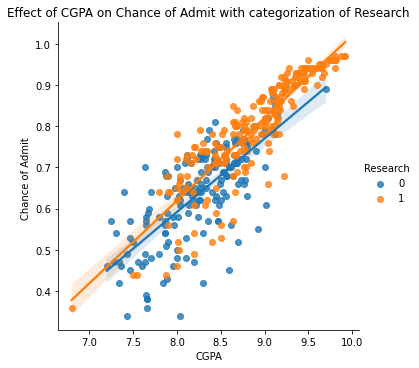

In [89]:
sns.lmplot(y="Chance of Admit ", x = "CGPA", hue="Research", data=data);
plt.title("Effect of CGPA on Chance of Admit with categorization of Research");

**Observations**



> As the CGPA increases the chance of Admit increases tremendously.

>Option of research with CGPA donot seems to have much of the impact compare to other features.



**Multivariate Analysis**

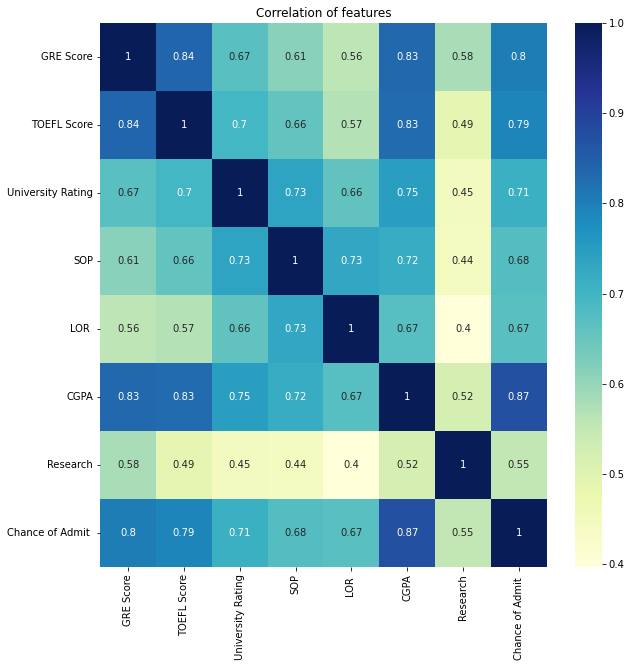

In [90]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu");
plt.title("Correlation of features");

**Observations**



> CGPA Score has the most impact on Chance of Admit. It is followed by GRE and TOFEL Score.

>Research option has the least impact on the chance of admit.

>University Ranking, statement of purpose and the letter of recommendation are also having impact on the chance of admit.



**OUTLIERS TREATMENT**

Based on the Explorative analysis we have a outlier that can keep the outlier as its one case where the applicant has performed very low score compared to other applicants. And the value is not very out of bound but is in the range of possible and realistic value.

In [91]:
data.shape

(400, 8)

In [92]:
data = data.reset_index(drop=True)

In [93]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [94]:
data.tail()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67
399,333,117,4,5.0,4.0,9.66,1,0.95


**MODEL BUILDING**

**Data Preparations**

In [95]:
X = data[data.columns.drop('Chance of Admit ')]
y = data["Chance of Admit "]

In [96]:
X.shape

(400, 7)

In [97]:
y.shape

(400,)

**Standardization Of Dataset**

In [98]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_scaled = mm.fit_transform(X)

**Training and Testing the model**

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X.values, y.values, test_size=0.20, random_state=10)

In [100]:
X_train.shape, y_train.shape

((320, 7), (320,))

In [101]:
X_test.shape, y_test.shape

((80, 7), (80,))

**Applying LINEAR REGRESSION**

In [102]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()


In [103]:
lr.fit(X_train,y_train)

LinearRegression()

In [104]:
pred=lr.predict(X_test)

In [105]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,pred)
mse


0.004376052769945701

In [106]:
rmse= np.sqrt(mse)
rmse

0.06615174049067568

In [107]:
r2=r2_score(y_test,pred)
r2 

0.7571471505242843

**Observation**



> MEAN_SQUARED_ERROR : Since the mean_sqared_error must be much low or 0 for a good model, the obtained model has the mean_sqared_error value 0.0043... and hence it is a good model for this dataset.





> R2_SCORE : For a good model the r2_score must be above 0.7 and the obtained model is o.757... and hence it is a good model for this dataset.





In [108]:
lr.predict([[337,118,4,4.5,4.5,9.65,1]])

array([0.95549367])

## DEPLOYMENT

In [109]:
!pip install -U ibm-watson-machine-learning

In [110]:
from ibm_watson_machine_learning import APIClient
import json
import numpy as np

## Authenticate and Set Space

In [111]:
wml_credentials={
    "apikey":"Nao5NlrxCCWqpmFusPqFp8KCgT66q4gvH2IiJQFq_HcL",
    "url":"https://eu-de.ml.cloud.ibm.com"
}

In [112]:
wml_client=APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -----------------------------  ------------------------
ID                                    NAME                           CREATED
a3e5ac4d-5ec4-4db0-a720-9101fc8055fd  Linear Regression Model space  2022-11-16T11:39:51.968Z
------------------------------------  -----------------------------  ------------------------


In [113]:
SPACE_ID="a3e5ac4d-5ec4-4db0-a720-9101fc8055fd"

In [114]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [115]:
wml_client.software_specifications.list(500)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [116]:
MODEL_NAME = "lrModel"
DEPLOYMENT_NAME= "lrDeploy"
DEMO_MODEL=lr

In [122]:
#set python version
software_spec_uid = wml_client.software_specifications.get_id_by_name('runtime-22.1-py3.9')

In [123]:
#Setup model meta
model_props = {
    wml_client.repository.ModelMetaNames.NAME:MODEL_NAME,
    wml_client.repository.ModelMetaNames.TYPE:'scikit-learn_1.0',
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
}

In [125]:
#Save Model
model_details = wml_client.repository.store_model(
      model = DEMO_MODEL,
      meta_props = model_props,
      training_data = X_train,
      training_target = y_train
)

In [126]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'l1',
  'schemas': {'input': [{'fields': [{'name': 'f0', 'type': 'float'},
      {'name': 'f1', 'type': 'float'},
      {'name': 'f2', 'type': 'float'},
      {'name': 'f3', 'type': 'float'},
      {'name': 'f4', 'type': 'float'},
      {'name': 'f5', 'type': 'float'},
      {'name': 'f6', 'type': 'float'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-11-17T08:31:37.367Z',
  'id': 'cc13036f-fb7d-4072-8847-dd11a5dc7ba6',
  'modified_at': '2022-11-17T08:31:39.668Z',
  'name': 'lrModel',
  'owner': 'IBMid-6670006ND4',
  'resource_key': 'e43d00d4-43eb-4d7b-aecc-c724850585ab',
  'space_id': 'a3e5ac4d-5ec4-4db0-a720-9101fc8055fd'},
 'system': {'warnings': []}}

In [135]:
model_id = wml_client.repository.get_model_id(model_details)

In [136]:
model_id

'cc13036f-fb7d-4072-8847-dd11a5dc7ba6'

In [131]:
X_train[0]

array([323.  , 107.  ,   3.  ,   3.5 ,   3.5 ,   8.55,   1.  ])

In [137]:
lr.predict([[323.  , 107.  ,   3.  ,   3.5 ,   3.5 ,   8.55,   1.  ]])

array([0.7362136])